In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [9]:
from ISLP import load_data
Boston = load_data('Boston')
Boston.head()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [21]:
# Modelltraining

X = Boston.drop("medv",axis=1)
y = Boston["medv"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

dtr = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

print('MSE Train: ', mean_squared_error(y_train, y_train_pred))
print('MSE Test: ', mean_squared_error(y_test, y_test_pred))

MSE Train:  0.0
MSE Test:  26.665460526315787


[Text(0.5061627730582524, 0.975, 'x[11] <= 9.545\nsquared_error = 81.189\nsamples = 354\nvalue = 22.34'),
 Text(0.255374479889043, 0.925, 'x[5] <= 7.435\nsquared_error = 78.714\nsamples = 136\nvalue = 29.99'),
 Text(0.14147018030513175, 0.875, 'x[7] <= 1.485\nsquared_error = 45.062\nsamples = 117\nvalue = 27.666'),
 Text(0.13869625520110956, 0.825, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.14424410540915394, 0.825, 'x[5] <= 6.542\nsquared_error = 28.375\nsamples = 113\nvalue = 26.875'),
 Text(0.05235783633841886, 0.775, 'x[5] <= 6.132\nsquared_error = 11.126\nsamples = 53\nvalue = 22.892'),
 Text(0.017337031900138695, 0.725, 'x[11] <= 7.41\nsquared_error = 7.679\nsamples = 23\nvalue = 20.765'),
 Text(0.005547850208044383, 0.675, 'x[5] <= 4.748\nsquared_error = 3.794\nsamples = 5\nvalue = 23.92'),
 Text(0.0027739251040221915, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 27.5'),
 Text(0.008321775312066574, 0.625, 'x[4] <= 0.572\nsquared_error = 0.737\nsamples = 4\nv

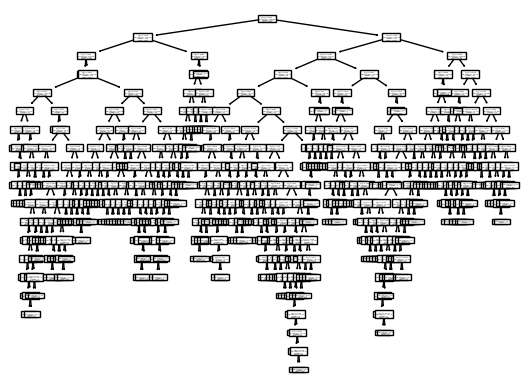

In [11]:
# Plot des trainierten Baumes
tree.plot_tree(dtr)

Bestes Alpha (durch Cross-Validation): 0.3593301049232971
Train Score (R^2): 0.9080228016229759
Test Score (R^2): 0.8407462609028826
Bester Train MSE: 7.467542576416054
Bester Test MSE: 14.596319775990256


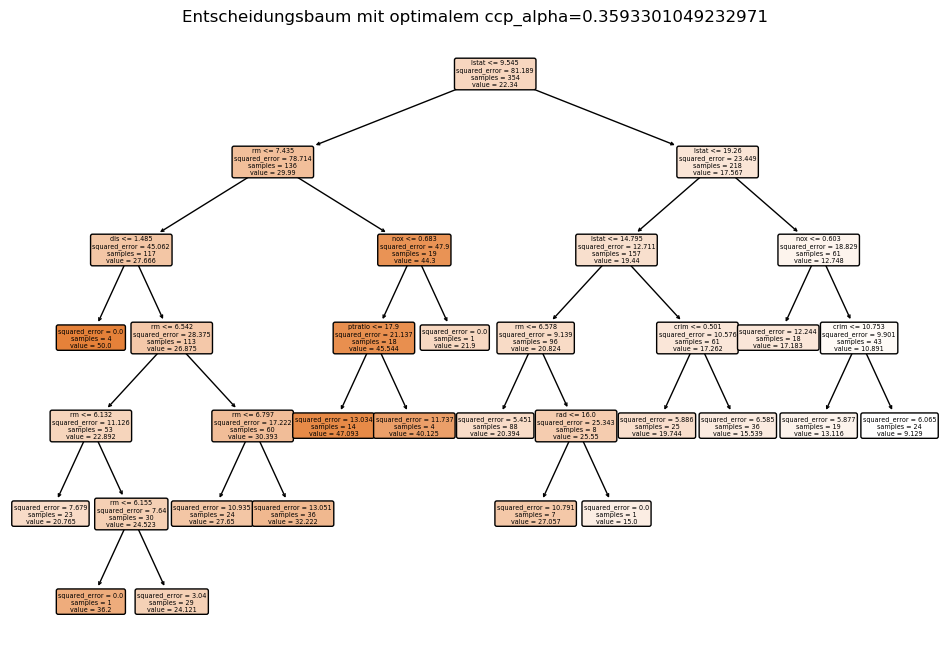

In [27]:
# Cost-Complexity Pruning-Pfade bestimmen
path = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Die Liste der Alpha-Werte

# Cross-Validation mit GridSearchCV für ccp_alpha
param_grid = {'ccp_alpha': ccp_alphas}

# Verwende GridSearchCV mit einer K-Fold Cross-Validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=KFold(n_splits=5), scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Bestes Modell auswählen (das Modell mit dem besten ccp_alpha-Wert)
best_regressor = grid_search.best_estimator_

# Ergebnisse evaluieren
train_score = best_regressor.score(X_train, y_train)
test_score = best_regressor.score(X_test, y_test)
best_train_mse = mean_squared_error(y_train, best_regressor.predict(X_train))
best_test_mse = mean_squared_error(y_test, best_regressor.predict(X_test))

print(f"Bestes Alpha (durch Cross-Validation): {grid_search.best_params_['ccp_alpha']}")
print(f"Train Score (R^2): {train_score}")
print(f"Test Score (R^2): {test_score}")
print(f"Bester Train MSE: {best_train_mse}")
print(f"Bester Test MSE: {best_test_mse}")

# Baum visualisieren
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(best_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title(f"Entscheidungsbaum mit optimalem ccp_alpha={grid_search.best_params_['ccp_alpha']}")
plt.show()